In [10]:
#Importing the necessary packages and setting the general plot size.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,5)

In [3]:
#Getting a general overview of the dataset. We can immediately see which metrics carry more weight in popular music thanks
#to their higher mean values.
gldata = pd.read_excel(r'C:\Users\cpoll\Documents\getluckydata.xlsx', header=0)
print(gldata.describe())
print(gldata.info())

         Length (MS)  Acousticness  Danceability       Energy     Liveness  \
count    1041.000000   1041.000000   1041.000000  1041.000000  1041.000000   
mean   222032.781940      0.157385      0.662536     0.681052     0.176074   
std     40686.088923      0.198398      0.130018     0.158068     0.134399   
min    121886.000000      0.000046      0.209000     0.056500     0.021000   
25%    198293.000000      0.021100      0.580000     0.581000     0.093800   
50%    217653.000000      0.075700      0.671000     0.701000     0.123000   
75%    238426.000000      0.214000      0.752000     0.802000     0.212000   
max    495400.000000      0.981000      0.963000     0.972000     0.833000   

       Loudness (dB)  Speechiness      Valence  Tempo (BPM)  Time Signature  
count    1041.000000  1041.000000  1041.000000  1041.000000     1041.000000  
mean       -5.767930     0.097692     0.518532   121.266150        3.998079  
std         2.045649     0.094327     0.223897    27.248973    

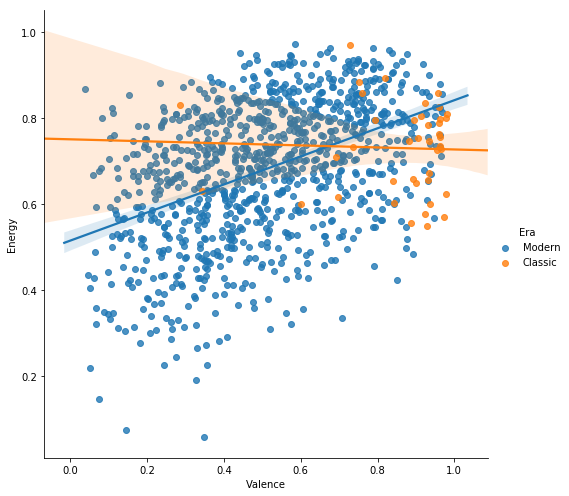

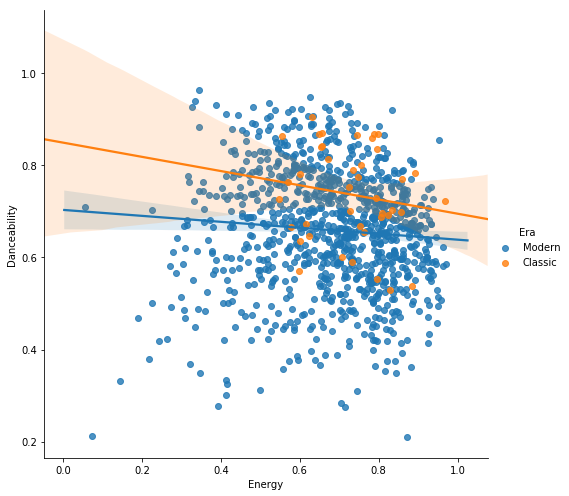

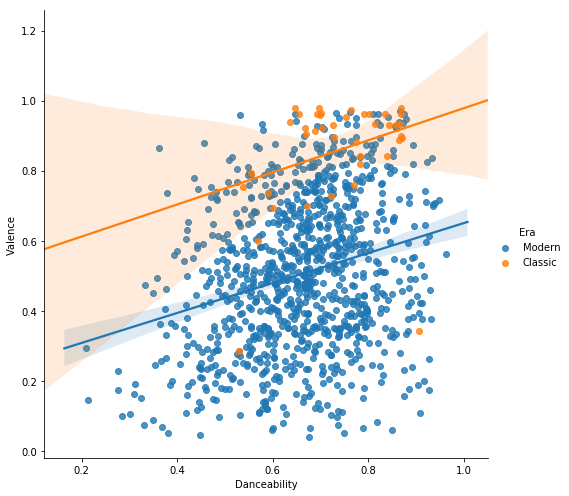

In [11]:
#Now knowing our most important metrics, we plot the regression of each one against eachother to quantitate their relationships.
#From our first regression we see issues with the size of our Classic sample of songs (~40), making it hard to draw a strong
#conclusion, however modern music shows a clear positive relationship between valence and energy. Luckily we see more clear
#Classic trends in our next two plots, with energy and danceablity having negative correlations, while valence and dance show
#positive ones. Good moods go hand in hand with dancing, while fast, loud and intense energy doesn't seem to always translate
#into a danceable beat.
np.array(gldata)
sns.lmplot(x='Valence', y='Energy', data=gldata, hue='Era', height=7)
sns.lmplot(x='Energy', y='Danceability', data=gldata, hue='Era', height=7)
sns.lmplot(x='Danceability', y='Valence', data=gldata, hue='Era', height=7)

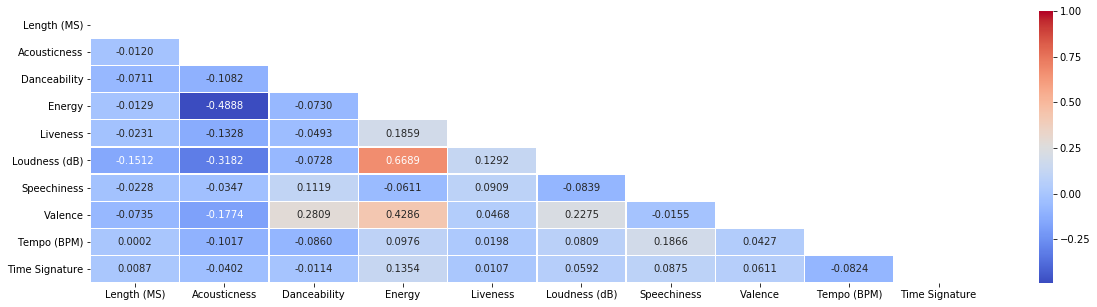

In [12]:
#Heat map showing the correlation between all metrics, in numerical form. Here we see the metric that Energy most positively
#correlates to, Loudness, which makes complete sense since. According to Spotify, Metal songs tend to score very highly on
#energy, while classical music preludes tends to sit on the opposite end of the spectrum. We also see Energy's strong
#negative correlation with Acousticness, which also makes sense as that metric is tied to the existence of acoustic instruments.
mask = np.zeros(gldata.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(gldata.corr(), annot=True, linewidths=0.4, linecolor="white", fmt= '.4f', cmap="coolwarm", mask=mask)

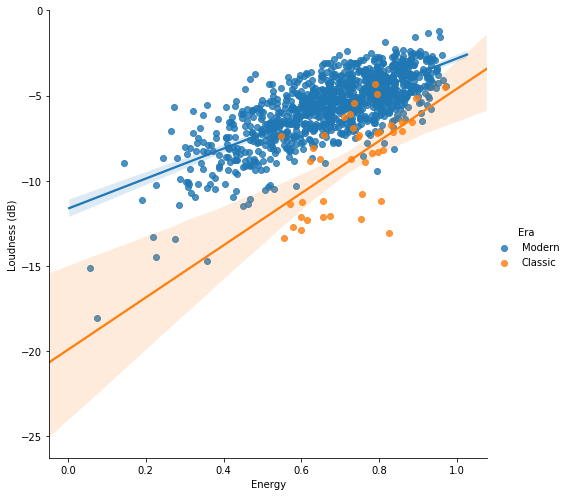

In [7]:
#This didn't make it into my final project but I was curious to see the regression of our strongest correlation, which shows 
#just about all of our Classic funk songs scoring on the upper register of both metrics. Perhaps real crash symbols come off
#as louder than synthesized ones.
sns.lmplot(x='Energy', y='Loudness (dB)', data=gldata, hue='Era', height=7)

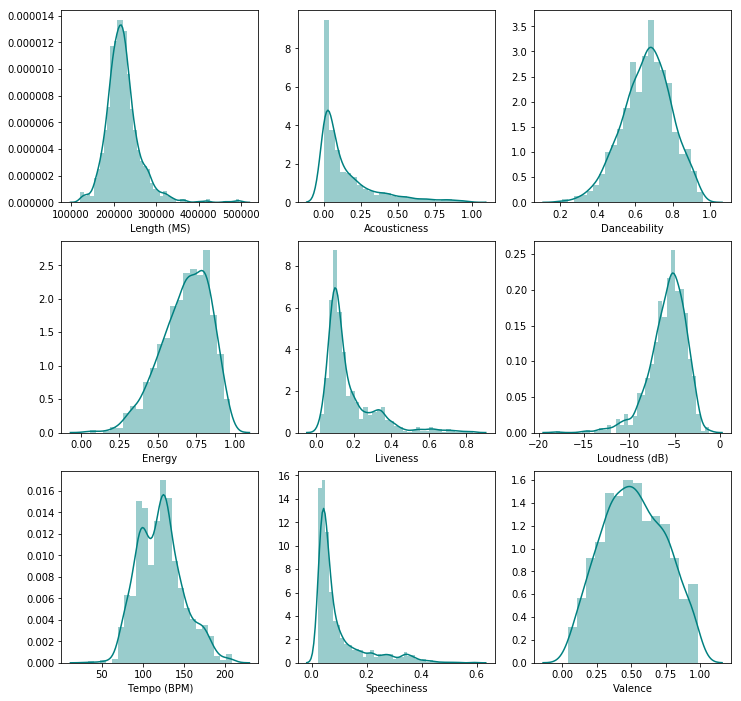

In [16]:
#Looking at the distribution of our dataset in the form of histographs with trend lines. In addition to seeing the prominence
#of our strongest metrics like Valence and Danceability, we see the uniformity of our other metrics across more than 1000 pop
#songs. The vast majority are all around 3:30 in length with tempos ranging from 110-130 BPM, and tend to be louder with low
#levels of acoustic instruments, live performances and musicless-speech, all of which make sense for pop music.
f, axes = plt.subplots(3, 3, figsize=(12, 12))
sns.distplot(gldata["Length (MS)"] , color="teal", ax=axes[0, 0])
sns.distplot(gldata["Acousticness"] , color="teal", ax=axes[0, 1])
sns.distplot(gldata["Danceability"] , color="teal", ax=axes[0, 2])
sns.distplot(gldata["Energy"] , color="teal", ax=axes[1, 0])
sns.distplot(gldata["Liveness"] , color="teal", ax=axes[1, 1])
sns.distplot(gldata["Loudness (dB)"] , color="teal", ax=axes[1, 2])
sns.distplot(gldata["Tempo (BPM)"] , color="teal", ax=axes[2, 0])
sns.distplot(gldata["Speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot(gldata["Valence"] , color="teal", ax=axes[2, 2])
plt.show()

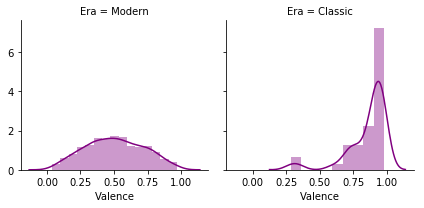

In [21]:
#Analyzing the distribution of our strongest 3 metrics, separating the data between Funk Classics and Modern Hits. While the low
#valence of modern hits might be puzzling, rap officially became the most popular form of music in 2015, without necessarily
#adopting all of the lyrical and upbeat themes that come with tradtional pop.
g = sns.FacetGrid(gldata, col = "Era")
g.map(sns.distplot, "Valence", color='purple')
plt.show()

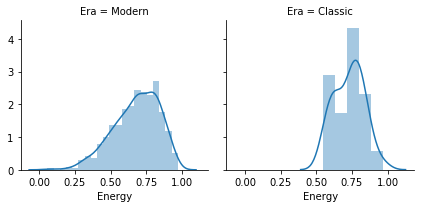

In [18]:
#Looking at Energy across eras reveals pretty similar plots, though its important to keep in mind the small sample size for our
#Classic era, which is probably responsible for the spikes we see there.
g = sns.FacetGrid(gldata, col = "Era")
g.map(sns.distplot, "Energy")
plt.show()

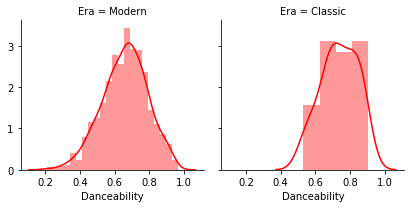

In [20]:
#Modern danceability gives us a nice tall bell curve reaching across the spectrum, whose height at least is matched by the
#Classic era. Classic songs may have higher average dance scores but modern songs can be just as danceable, while not
#necessarily needing to be, in order to top the charts.
g = sns.FacetGrid(gldata, col = "Era")
g.map(sns.distplot, "Danceability", color='red')
plt.show()